## CEIS110 Module 6.2 NOAA Time Series Pandas Plot

August 8, 2023

Use Pandas to plot a time series DataFrame. Pandas uses matplotlib by default.

@author: Oscar Trevizo

## References
- https://pypi.org/project/noaa-sdk/
- https://www.weather.gov/documentation/services-web-api
- https://github.com/paulokuong/noaa
- https://www.weather.gov/media/documentation/docs/NWS_Geolocation.pdf
- https://github.com/paulokuong/noaa
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

YouTube:
https://youtu.be/c400IhsIJkA 

In [1]:
# Import libraries
import pandas as pd
import datetime
from noaa_sdk import noaa

## Get your data

In [2]:
# Init parameters
zip_code = '60610'
country = 'US'
today = datetime.datetime.now()
past = today - datetime.timedelta(days=14)
start_date = past.strftime("%Y-%m-%dT00:00:00Z")
end_date = today.strftime("%Y-%m-%dT23:59:59Z")

In [3]:
# Init object to connect to the REST API
weather = noaa.NOAA()

In [4]:
# Pull data from the weather
observations = weather.get_observations(zip_code, country, start_date, end_date)

In [5]:
# Init some lists
time = []
zc = []   # Optionally =, one could loop through several zip codes
wind_speed = []
temperature = []
humidity = []
wind_direction = []
pressure = []
visibility = []
description = []


In [6]:
for obs in observations:
    time.append(obs["timestamp"])
    zc.append(zip_code)
    wind_speed.append(obs["windSpeed"]["value"])
    temperature.append(obs["temperature"]["value"])
    humidity.append(obs["relativeHumidity"]["value"])
    wind_direction.append(obs["windDirection"]["value"])
    pressure.append(obs["barometricPressure"]["value"])
    visibility.append(obs["visibility"]["value"])
    description.append(obs["textDescription"])


In [7]:
# Build the DataFrame using dictionary
obs_df = pd.DataFrame({'time':time, 'zip_code':zc, 'temperature':temperature, 
                       'wind_speed':wind_speed, 'humidity':humidity,
                       'wind_direction':wind_direction, 'pressure':pressure, 
                       'pressure':pressure,
                       'visibility':visibility, 'description':description})


In [8]:
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            177 non-null    object 
 1   zip_code        177 non-null    object 
 2   temperature     177 non-null    float64
 3   wind_speed      173 non-null    float64
 4   humidity        177 non-null    float64
 5   wind_direction  172 non-null    float64
 6   pressure        177 non-null    int64  
 7   visibility      177 non-null    int64  
 8   description     177 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 12.6+ KB


## Build a time series

In [9]:
# Convert the DataFrame into a time series type of DataFrame
obs_df.time = pd.to_datetime(obs_df['time'])


In [10]:
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   time            177 non-null    datetime64[ns, UTC]
 1   zip_code        177 non-null    object             
 2   temperature     177 non-null    float64            
 3   wind_speed      173 non-null    float64            
 4   humidity        177 non-null    float64            
 5   wind_direction  172 non-null    float64            
 6   pressure        177 non-null    int64              
 7   visibility      177 non-null    int64              
 8   description     177 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(2)
memory usage: 12.6+ KB


In [11]:
# Assign the column 'time' to be the index of my DataFrame obs_df
obs_df.set_index('time', inplace=True)


In [12]:
obs_df.head()

,zip_code,temperature,wind_speed,humidity,wind_direction,pressure,visibility,description
time,,,,,,,,
2023-08-12 09:53:00+00:00,60610,22.2,9.36,71.036744,190.0,100850,16090,Partly Cloudy
2023-08-12 08:53:00+00:00,60610,22.8,5.40,65.927975,160.0,100850,16090,Partly Cloudy
2023-08-12 07:53:00+00:00,60610,23.3,7.56,61.951861,190.0,100920,16090,Mostly Cloudy
2023-08-12 06:53:00+00:00,60610,23.3,7.56,61.951861,110.0,100950,16090,Mostly Cloudy
2023-08-12 06:17:00+00:00,60610,24.4,22.32,57.986289,360.0,101050,16090,Mostly Cloudy


## Pandas plot on time series

Pandas has a plot() method that you can use easily on a time series.

<Axes: xlabel='time'>

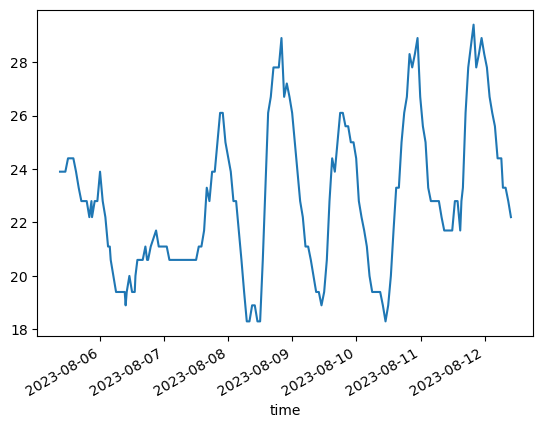

In [13]:
obs_df.temperature.plot()

<Axes: xlabel='time'>

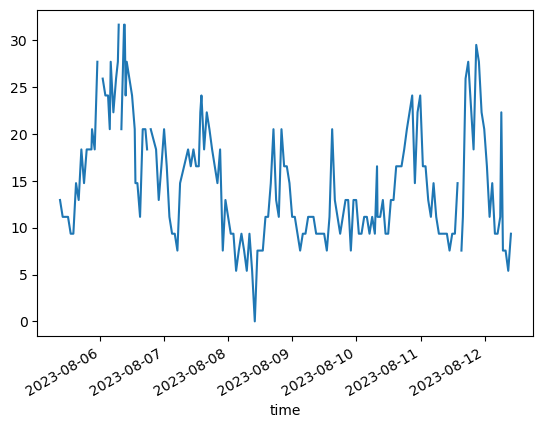

In [14]:
obs_df.wind_speed.plot()

<Axes: xlabel='time'>

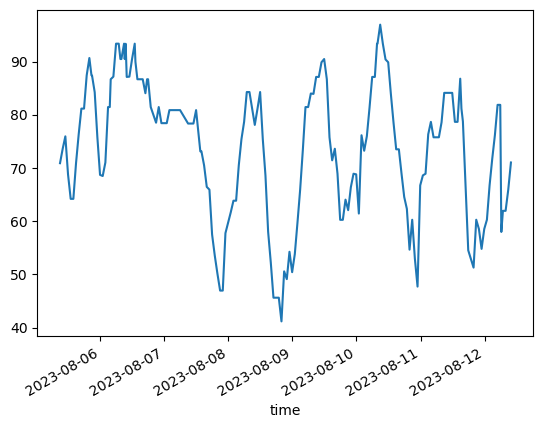

In [15]:
obs_df.humidity.plot()